<a href="https://colab.research.google.com/github/wasif31/Artificial-Intelligence-Course-Lab/blob/main/4.Implement_(02)_and_(03)_Using_Neural_Network_Techniques/03.Estimate_House_Rent_Using_Linear_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neural Networking
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output.


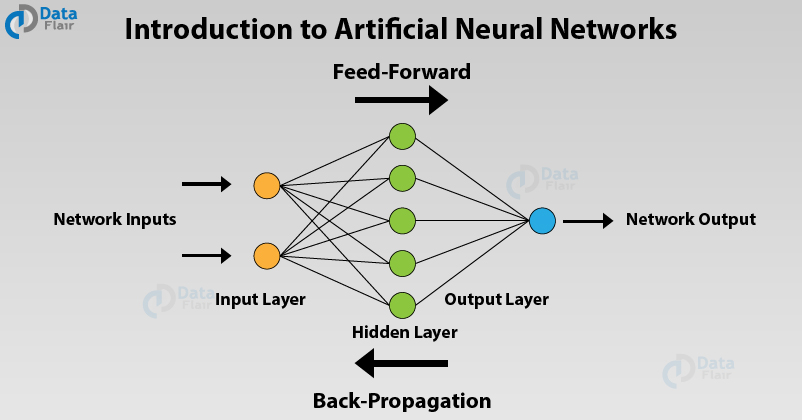


In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import statsmodels.api as sm
#Validation
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm
#ANN Library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [81]:
rentdataurl = 'https://raw.githubusercontent.com/wasif31/Artificial-Intelligence-Course-Lab/main/3.Estimate_House_Rent_Using_Linear_regression/house_rent_data.csv.csv'
dataframe1 = pd.read_csv(rentdataurl)
# Dataset is now stored in a Pandas Dataframe


In [82]:
dataframe1.head(10)

,id,date,rent_fee,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latatitude,longitude,sqft_living15,sqft_lot15
0,1,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
1,2,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
3,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,5000
4,5,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
5,6,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
6,7,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
7,8,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
8,9,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
9,10,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


# Field Definations



*   id - unique identified for a house



*   date - Date house was sold
*   rent fee - Price is prediction target


*  bedrooms - Number of Bedrooms/House

*   bathrooms - Number of bathrooms/bedrooms

*   sqft_living - square footage of the home

*   sqft_lot - square footage of the lot

*   floors - Total floors (levels) in house

*   waterfront - House which has a view to a waterfront

*   view - Has been viewed
*   condition - How good the condition is ( Overall )


*   grade - overall grade given to the housing unit, based on King County grading system


*   sqft_above - square footage of house apart from basement


* sqft_basement - square footage of the basement


*   yr_built - Built Year


*  zipcode - zip


*   lat - Latitude coordinate

*  long - Longitude coordinate

*   sqft_living15 - The square footage of interior housing living space for the 
*   nearest 15 neighbors


*  sqft_lot15- The square footage of the land lots of the nearest 15 neighbors






In [83]:
dataframe1.shape
#number of rows,columns

(5313, 21)

In [84]:
dataframe1.describe()
#Statistical summary of data frame.

,id,rent_fee,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latatitude,longitude,sqft_living15,sqft_lot15
count,5313.000000,5.313000e+03,5313.000000,5313.000000,5313.000000,5.313000e+03,5313.00000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000
mean,2657.000000,5.384864e+05,3.374365,2.063806,2064.225485,1.613046e+04,1.43290,0.008846,0.240166,3.451722,7.600791,1757.828157,306.397327,1966.833804,94.341991,98078.490683,47.559390,-122.215507,1981.420290,13378.067570
std,1533.875321,3.810927e+05,0.907049,0.771756,921.483589,4.559066e+04,0.51031,0.093646,0.768295,0.675500,1.164895,819.637189,455.508887,28.221999,423.725467,53.964673,0.139815,0.141055,676.757322,26164.967348
min,1.000000,7.500000e+04,0.000000,0.000000,380.000000,6.090000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,1329.000000,3.188880e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1949.000000,0.000000,98033.000000,47.462600,-122.329000,1490.000000,5400.000000
50%,2657.000000,4.500000e+05,3.000000,2.000000,1900.000000,7.884000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1968.000000,0.000000,98070.000000,47.573200,-122.233000,1830.000000,7807.000000
75%,3985.000000,6.500000e+05,4.000000,2.500000,2506.000000,1.123400e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.129000,2350.000000,10436.000000
max,5313.000000,7.060000e+06,9.000000,6.750000,10040.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,7680.000000,3000.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


Here,

*  count	- total number
*   mean-mean or average

*   std-standarf deviation

*   min-minimum value
*   25%-25th percentiles


*   50%-50th percentiles


*  75%-75th percentiles
*   max-maximum value


In [85]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5313 non-null   int64  
 1   date           5313 non-null   object 
 2   rent_fee       5313 non-null   float64
 3   bedrooms       5313 non-null   int64  
 4   bathrooms      5313 non-null   float64
 5   sqft_living    5313 non-null   int64  
 6   sqft_lot       5313 non-null   int64  
 7   floors         5313 non-null   float64
 8   waterfront     5313 non-null   int64  
 9   view           5313 non-null   int64  
 10  condition      5313 non-null   int64  
 11  grade          5313 non-null   int64  
 12  sqft_above     5313 non-null   int64  
 13  sqft_basement  5313 non-null   int64  
 14  yr_built       5313 non-null   int64  
 15  yr_renovated   5313 non-null   int64  
 16  zipcode        5313 non-null   int64  
 17  latatitude     5313 non-null   float64
 18  longitud

In [86]:
dataframe1['date'] = pd.to_datetime(dataframe1['date'])
#convert datetime to date

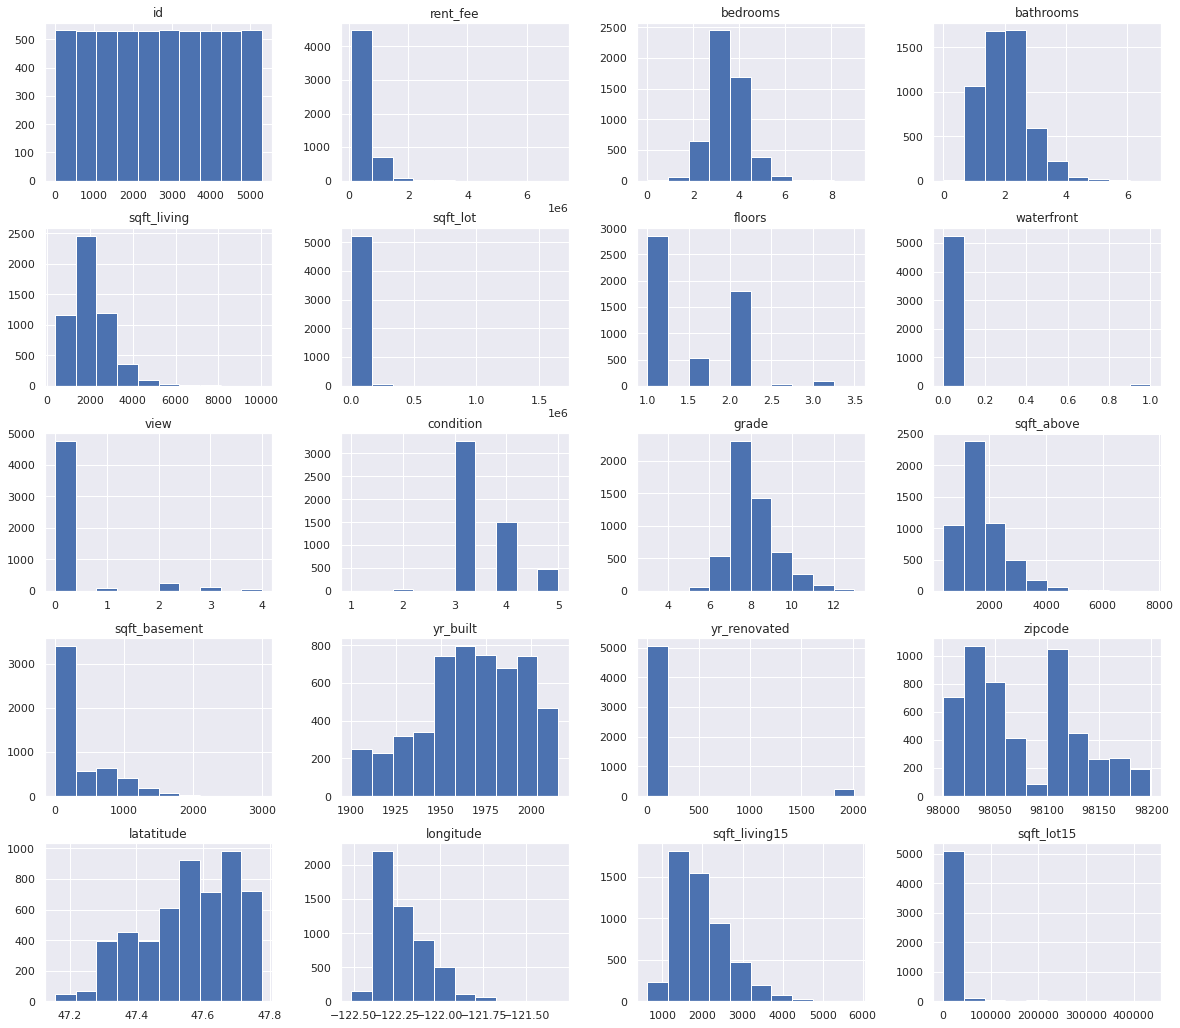

In [87]:
dataframe1.hist(figsize = (20,18));

In [88]:
dataframe1.columns

Index(['id', 'date', 'rent_fee', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latatitude', 'longitude', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [89]:
cols=[ 'rent_fee', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latatitude', 'longitude', 'sqft_living15', 'sqft_lot15']

#cols=df.columns
warnings.filterwarnings("ignore")
for i in cols:
  x = np.random.randn(100)

In [90]:
df_cont=dataframe1.loc[:,['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]

In [91]:
cat_list=['yr_built','condition','longitude','latatitude','waterfront','floors','view', 'bedrooms','sqft_basement']

In [92]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=dataframe1[i].astype('category')

In [93]:
from sklearn.preprocessing import quantile_transform
transform = quantile_transform(df_cont[['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']],
                                    output_distribution = 'normal')

trans_features = pd.DataFrame(transform)
trans_features.columns=['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']

In [94]:
df_final=pd.concat([trans_features, df_cat], axis=1)
y = df_final.rent_fee
x = df_final.drop(['rent_fee','yr_built','view','sqft_living15','waterfront'], axis=1)

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
x.head()

[0.34763295 0.03806869 0.0401427  0.0223358  0.05156095 0.37938618
 0.05100208 0.03301735 0.03685331]


,sqft_living,sqft_lot,sqft_lot15,condition,longitude,latatitude,floors,bedrooms,sqft_basement
0,-0.271787,0.049984,-0.116941,3,-122.045,47.6168,1.0,3,0
1,2.459152,2.010238,2.152134,3,-122.005,47.6561,1.0,4,1530
2,-0.225202,-0.325904,-0.325585,3,-122.327,47.3097,2.0,3,0
3,-1.331018,0.440890,-0.846279,3,-122.315,47.4095,1.0,3,0
4,-0.142244,-0.136313,0.103790,3,-122.337,47.5123,1.0,3,730


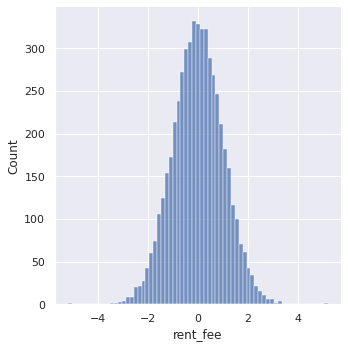

In [96]:
sns.displot(y)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [98]:
X_Best = SelectKBest(mutual_info_regression, k=4).fit_transform(x, y)
print(X_Best.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_Best, y, test_size=.3, random_state=0)

regressor = MLPRegressor()
regressor.fit(X_train,Y_train)
print(regressor.score(X_test,Y_test))
cross_val_score(regressor, X_train, Y_train, cv=7)

(5313, 4)
0.5112169169133397


array([0.49825544, 0.48741677, 0.37084842, 0.425545  , 0.46959614,
       0.51675312, 0.36415776])

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=0)
nuralNetworkModel = Sequential()
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [100]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.8)

27/27 [==============================] - 1s 17ms/step - loss: 1.0460 - mean_absolute_error: 1.0460 - val_loss: 0.7596 - val_mean_absolute_error: 0.7596


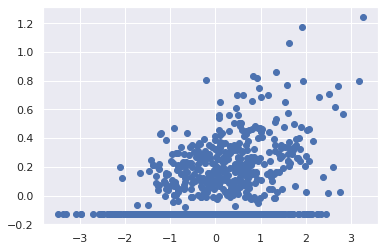

In [101]:
predictValues = nuralNetworkModel.predict(X_test)
plt.scatter(Y_test,predictValues)

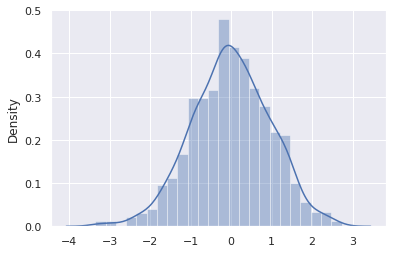

In [102]:
sns.distplot(Y_test.values.reshape(-1,1)-predictValues)

In [103]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictValues))
print('MSE:', metrics.mean_squared_error(Y_test, predictValues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictValues)))

MAE: 0.7670083038576305
MSE: 0.9349373100396886
RMSE: 0.9669215635405431


In [104]:
model.score(X_test, Y_test) * 100

99.80649114571132